In [1]:
# Import Libraries

import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import filters, measure, morphology

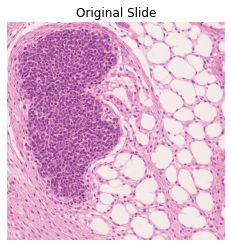

In [2]:
# Load a Pathology Slide

# Load your image
img = cv2.imread('pathology_slide_image_one.png')
# Convert to RGB (since openCV laods in BGR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img)
plt.axis('off')
plt.title('Original Slide')
plt.show()

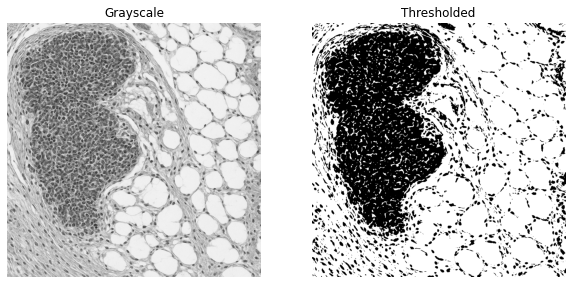

In [4]:
# Processing

# Convert to greyscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Blur the image
blurred = cv2.GaussianBlur(gray, (5,5), 0)

# Thresholding
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Show Results
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(binary, cmap='gray')
plt.title('Thresholded')
plt.axis('off')
plt.show()

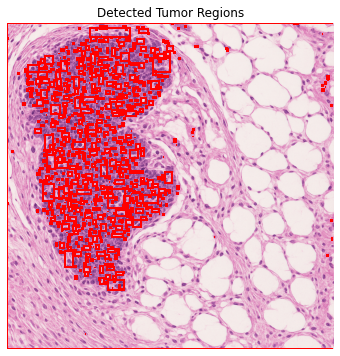

In [5]:
# Detect Tumor Regions

# Label connected components
labels = measure.label(binary, connectivity=2)
props = measure.regionprops(labels)

#Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(img)

for prop in props:
    #Draw rectangle around detected regions
    minr, minc, maxr, maxc = prop.bbox
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                         edgecolor='red', facecolor='none', linewidth=2)
    ax.add_patch(rect)
    
ax.set_title('Detected Tumor Regions')
ax.axis('off')
plt.show()